# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
import json
import random

from scipy.stats import linregress
from pprint import pprint

#Import Google and Weather Keys as well as Citipy
from config import g_key
from config import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
cities = []
latandLong=[]

lat = np.random.randint(-90,90,size=1750)
long = np.random.randint(-180,180,size=1750)
latandlongs=zip(lat,long)

#For Loop using citipy to determine cities close to desired location
for latandlong in latandlongs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

713

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city).json()
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 60.92,
        "lon": -46.05
    },
    "dt": 1602624253,
    "id": 3421719,
    "main": {
        "feels_like": 36.63,
        "humidity": 79,
        "pressure": 1002,
        "temp": 41,
        "temp_max": 41,
        "temp_min": 41
    },
    "name": "Narsaq",
    "sys": {
        "country": "GL",
        "id": 47,
        "sunrise": 1602582091,
        "sunset": 1602619128,
        "type": 1
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 2.24
    }
}


In [4]:
name =[]
country = []
lat = []
long = []
temp = []
hum = []
cloud = []
windspd = []
date = []

In [5]:
print('Loading')
print('-----------------------------')

for city in cities:
    try:
        response= requests.get(query_url + city).json()
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
        date.append(response['dt'])
        record_name = response['name']
        print(f'Loading {record_name}')
    except:
        print('Error - City Not Found')
    continue

print('Data Retrieval Complete')

Loading
-----------------------------
Loading Cabo San Lucas
Loading Yulara
Loading Lorengau
Loading Vestmanna
Error - City Not Found
Loading Hermanus
Loading Port-Gentil
Loading Atbasar
Loading Punta Arenas
Loading Busselton
Loading Hobart
Loading Port Alfred
Loading Atuona
Loading Cherskiy
Loading Bethel
Error - City Not Found
Loading Laguna
Error - City Not Found
Loading Ushuaia
Loading Tuktoyaktuk
Loading Albany
Loading Walla Walla
Loading Nishiwaki
Loading Puchezh
Loading Tiksi
Loading Quetta
Loading Samarai
Loading Khoy
Loading Colombo
Error - City Not Found
Loading Philadelphia
Loading Samandağ
Error - City Not Found
Loading Canton of Neuchâtel
Loading Hambantota
Loading Sitka
Loading New Norfolk
Loading Lompoc
Loading Salalah
Loading Nome
Loading Banda Aceh
Loading Redcliffe
Loading Carnarvon
Loading Aklavik
Loading Anadyr
Loading Khatanga
Loading San Buenaventura
Loading Mchinji
Loading Vardø
Loading Severo-Kuril'sk
Loading Faanui
Loading Cape Town
Loading Barrow
Loading Ullad

Loading Urubichá
Error - City Not Found
Loading Klaksvík
Loading Ukiah
Loading Poso
Loading Paitan
Loading Oussouye
Loading Saint-François
Loading Laje
Error - City Not Found
Loading Ouésso
Loading Basse-Pointe
Loading Cazones de Herrera
Loading Madera
Loading Saint Joseph
Loading Mason City
Loading Narsaq
Loading Shingū
Loading Faya
Loading Tiarei
Loading Portland
Loading Puerto Escondido
Loading Provideniya
Loading Torquay
Loading Canala
Loading Kupino
Loading Nova Olinda do Norte
Loading Turka
Loading Altay
Loading Fare
Loading Calabozo
Loading Alta Floresta
Loading Simbahan
Error - City Not Found
Loading Arroio Grande
Loading Boende
Loading Lenine
Loading Novobelokatay
Loading Cochrane
Loading Kirya
Loading Kiama
Loading Dauphin
Loading Antalaha
Loading Rokytne
Loading Gachsaran
Loading San Miguel de Tucumán
Loading Vila Franca do Campo
Loading Ascension
Loading Pokaran
Loading Wairoa
Loading Sakakah
Loading Tubmanburg
Loading Harrismith
Loading Mizdah
Loading Riberalta
Loading For

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
api_challenge={"City":name,"Latitude":lat,"Longitude":long,"Temperature":temp,"Humidity": hum,"Cloudiness": cloud,"Wind Speed":windspd,"Country": country,"Date":date}
#Create Dataframe "data"
data = pd.DataFrame(api_challenge)

In [7]:
#Print "Data" head to make sure it is working
#data.head()
data.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.89,-109.91,87.48,58,40,12.75,MX,1602624112
1,Yulara,-25.24,130.99,60.80,29,0,9.17,AU,1602624253
2,Lorengau,-2.02,147.27,81.43,81,100,5.61,PG,1602624253
3,Vestmanna,62.16,-7.17,44.60,93,34,3.06,FO,1602624253
4,Hermanus,-34.42,19.23,48.00,88,0,10.92,ZA,1602624254
5,Port-Gentil,-0.72,8.78,78.80,83,90,12.75,GA,1602624254
6,Atbasar,51.80,68.33,46.78,53,93,3.83,KZ,1602624254
7,Punta Arenas,-53.15,-70.92,41.52,80,90,38.03,CL,1602623974
8,Busselton,-33.65,115.33,57.47,78,56,13.67,AU,1602624255
9,Hobart,-42.88,147.33,44.04,87,20,8.05,AU,1602624039


In [8]:
# Export to CSV
data.to_csv("Output/data.csv", index=False, header =True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Look for cities with humidity over 100%
humidity = data.loc[data['Humidity']>100]
humidity

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
print('No Cities have Humidity over 100%')

No Cities have Humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

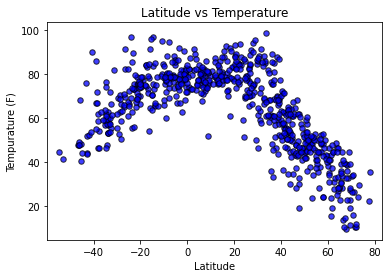

In [11]:
x_value = data['Latitude']
y_value = data['Temperature']

plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)

#Use min and max functions for latitude to set x axis and while using +-5 to give space.
plt.xlim((data['Latitude'].min())-5,(data['Latitude'].max())+5)

#Use min and max functions for Temp while using +-5 to give space.
plt.ylim((data['Temperature'].min())-5,(data['Temperature'].max())+5)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Tempurature (F)')
#Create and Save File to 
plt.savefig('Output/Lat_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

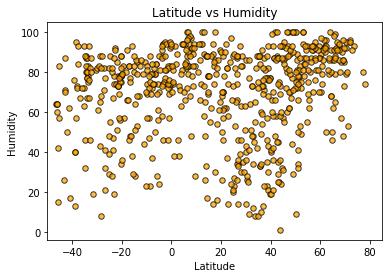

In [12]:
#Create Graph for Latitude and Humidity
x_value = data['Latitude']
y_value = data['Humidity']

plt.scatter(x_value, y_value, marker="o", facecolors="orange", edgecolors="black",
            s=30, alpha=0.75)
plt.xlim(-50, 85)

#Use min and max functions and to set axis while using +-5 to give space.
plt.ylim((data['Humidity'].min())-5,(data['Humidity'].max())+5)

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Output/Lat_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

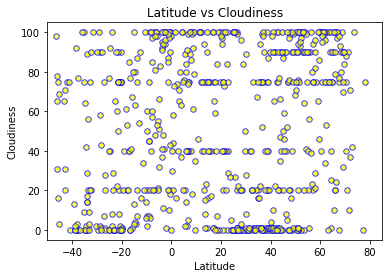

In [13]:
x_value = data['Latitude']
y_value = data['Cloudiness']

plt.scatter(x_value, y_value, marker="o", facecolors="yellow", edgecolors="blue",
            s=30, alpha=0.75)
plt.xlim(-50, 85)

#Use min and max functions and to set axis while using +-5 to give space.
plt.ylim((data['Cloudiness'].min())-5,(data['Cloudiness'].max())+5)

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Output/Lat_Cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

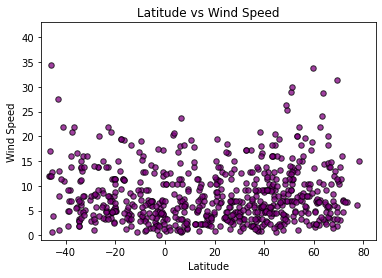

In [14]:
#Create Scatter Plot
x_value = data['Latitude']
y_value = data['Wind Speed']

plt.scatter(x_value, y_value, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.xlim(-50, 85)

#Use min and max functions and to set axis while using +-5 to give space.
plt.ylim(((data['Wind Speed'].min())-1),(data['Wind Speed'].max())+5)

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Output/Lat_Wind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.845125121034067


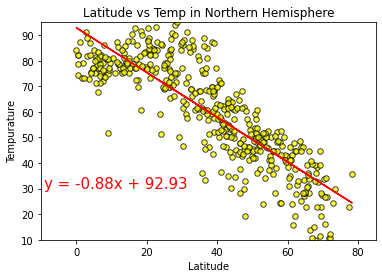

In [15]:
north = data.loc[data['Latitude']>=0]

x_values = north['Latitude']
y_values = north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="yellow", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-9,30),fontsize=15,color="red")
plt.xlim(-10, 85)
plt.ylim(10,95 )
plt.title('Latitude vs Temp in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Tempurature')
plt.savefig('Output/Lat_Temp_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6690964175811651


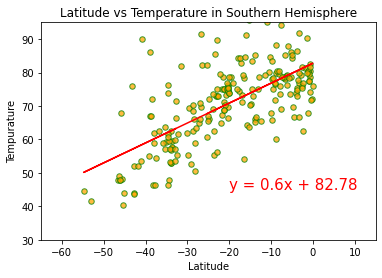

In [16]:
south = data.loc[data['Latitude']<=0]
x_values = south['Latitude']
y_values = south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="orange", edgecolors="green",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 45),fontsize=15,color="red")
plt.xlim(-65, 15)
plt.ylim(30,95 )
plt.title('Latitude vs Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Tempurature')

plt.savefig('Output/Lat_Temp_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.140374935418199


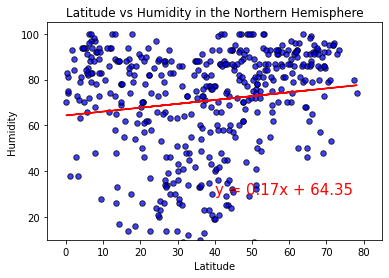

In [17]:
northern = data.loc[data['Latitude']>=0]

x_values = northern['Latitude']
y_values = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlim(-5, 85)
plt.ylim(10,105 )
plt.title('Latitude vs Humidity in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Output/Lat_Humid_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17743025792211795


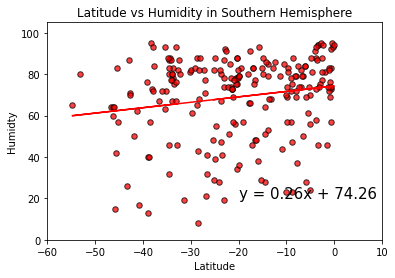

In [18]:
#So much Copy Pasta for these graphs
southern = data.loc[data['Latitude']<=0]
x_values = southern['Latitude']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 20),fontsize=15,color="black")
plt.xlim(-60, 10)
plt.ylim(0,105)
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidty')

plt.savefig('Output/Lat_Humidity_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13418980827062774


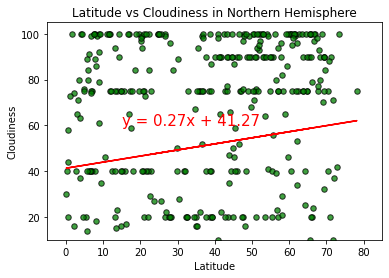

In [19]:
nhem = data.loc[data['Latitude']>=0]
x_values = nhem['Latitude']
y_values = nhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.xlim(-5, 85)
plt.ylim(10,105 )
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Output/Lat_Cloud_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24369441946320894


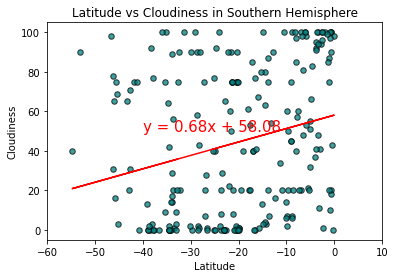

In [20]:
shem = data.loc[data['Latitude']<=0]
x_values = shem['Latitude']
y_values = shem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40, 50),fontsize=15,color="red")
plt.xlim(-60, 10)
plt.ylim(-5,105)
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig('Output/Lat_Cloud_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15665767224835012


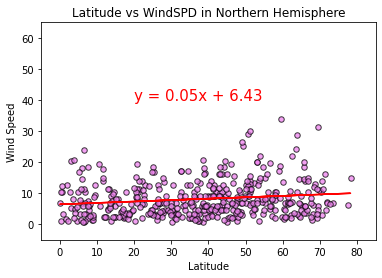

In [21]:
nwind = data.loc[data['Latitude']>=0]
x_values = nwind['Latitude']
y_values = nwind['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="violet", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlim(-5, 85)
plt.ylim(-5,65 )
plt.title('Latitude vs WindSPD in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Output/Lat_Wind_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.30257177409025604


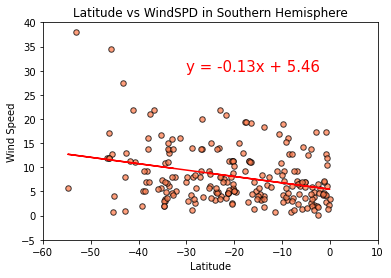

In [22]:
swind = data.loc[data['Latitude']<=0]
x_values = swind['Latitude']
y_values = swind['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="coral", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 30),fontsize=15,color="red")
plt.xlim(-60, 10)
plt.ylim(-5,40)
plt.title('Latitude vs WindSPD in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig('Output/Lat_Wind_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()